<a href="https://colab.research.google.com/github/majedSD/DIP_Assignment/blob/main/2019331563(DIP_Lab_Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.bmp`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



## Lab Resources
https://drive.google.com/drive/folders/1LCzyaqtd0LmaHKQUTkZUNh2RAK0bDna0?usp=sharing

**Lab Task-1**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


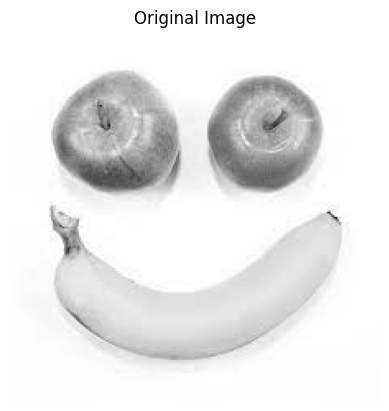

Image dimensions: 225 x 225


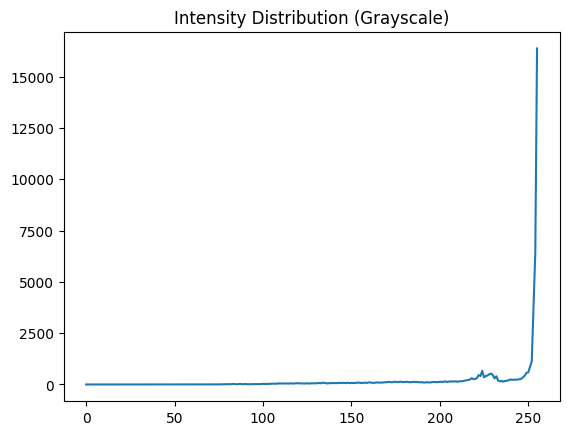

Min intensity:  5
Max intensity:  255
Intensity range: 5 - 255


In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

image1 =  cv2.imread('/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_01.png')

if image1 is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    image_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

height, width, channels = image1.shape
print(f"Image dimensions: {width} x {height}")

# frequency distribution
plt.title("Intensity Distribution (Grayscale)")
hist = cv2.calcHist([image1], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

#range
print("Min intensity: ", image1.min())
print("Max intensity: ", image1.max())
print(f"Intensity range: {image1.min()} - {image1.max()}")

**Lab Task-2**

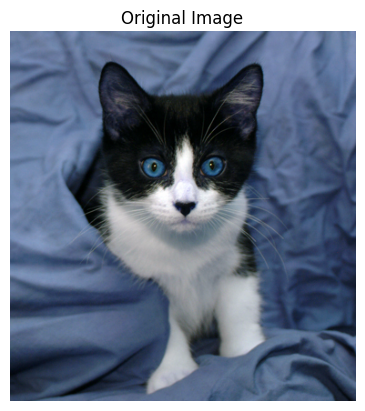

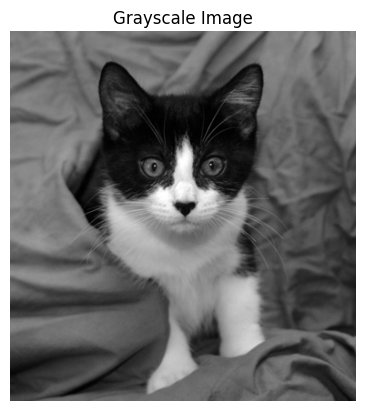

Original Image Sub-Region:
[[[110 129 164]
  [108 127 164]
  [107 127 162]
  [104 125 163]
  [105 127 163]]

 [[112 129 162]
  [107 128 159]
  [105 129 159]
  [107 126 163]
  [107 129 164]]

 [[108 128 163]
  [108 127 160]
  [110 124 160]
  [106 125 162]
  [108 127 165]]

 [[107 127 162]
  [106 125 162]
  [106 123 162]
  [105 125 160]
  [109 128 163]]

 [[108 127 160]
  [106 124 161]
  [104 124 159]
  [103 123 158]
  [108 127 162]]]

Grayscale Image Sub-Region:
[[0.4999451  0.49266745 0.49126863 0.48344039 0.48988471]
 [0.50104627 0.49322588 0.49436471 0.48874588 0.4974451 ]
 [0.4951902  0.49153647 0.48478667 0.48482431 0.4929502 ]
 [0.49126863 0.48482431 0.47921333 0.48342549 0.49602353]
 [0.49153647 0.48173608 0.47950392 0.47558235 0.49210196]]

Average intensity: 131.68
Average intensity: 0.48946152156862743
Difference: 131.1905384784314


In [10]:
from skimage.color import rgb2gray
image_path_2=cv2.imread('/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_02.jpg')

#Showing original image
plt.imshow(image_path_2)
plt.axis('off')
plt.title("Original Image")
plt.show()

gray_image = rgb2gray(image_path_2)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()

# Define the sub-region (5x5)
x = 5;y = 5
sub_region_original = image_path_2[y:y+5, x:x+5]
sub_region_gray = gray_image[y:y+5, x:x+5]
print("Original Image Sub-Region:")
print(sub_region_original)
print("\nGrayscale Image Sub-Region:")
print(sub_region_gray)

avg_original = np.mean(sub_region_original)
avg_gray = np.mean(sub_region_gray)
print("\nAverage intensity:", avg_original)
print("Average intensity:", avg_gray)
print("Difference:", avg_original - avg_gray)

**Lab Task-3**

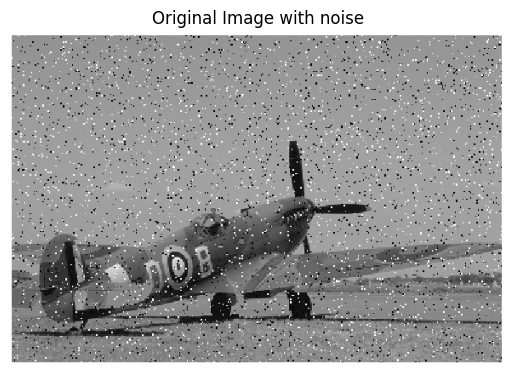

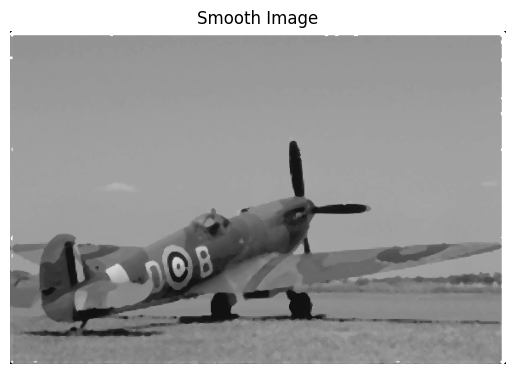

In [9]:
#image smoothing
def conv(image, kernel):
  kh, kw = kernel.shape
  ph = kh//2
  pw = kw//2

  padded_image = np.pad(image, ((ph, ph), (pw, pw)), 'constant')

  rows, cols = image.shape
  output = np.zeros((rows, cols))

  for i in range(rows):
    for j in range(cols):
        roi = padded_image[i:i+kh, j:j+kw]
        output[i, j] = np.median(roi)

  return output

img3 = cv2.imread('/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_03.png')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
smoothing_kernel = np.ones((5, 5), dtype=np.uint8)/9

smooth_img = conv(img3_gray, smoothing_kernel)

plt.imshow(img3)
plt.axis('off')
plt.title('Original Image with noise')
plt.show()

plt.imshow(smooth_img, cmap = 'gray')
plt.axis('off')
plt.title('Smooth Image')
plt.show()

**Lab Task-4**

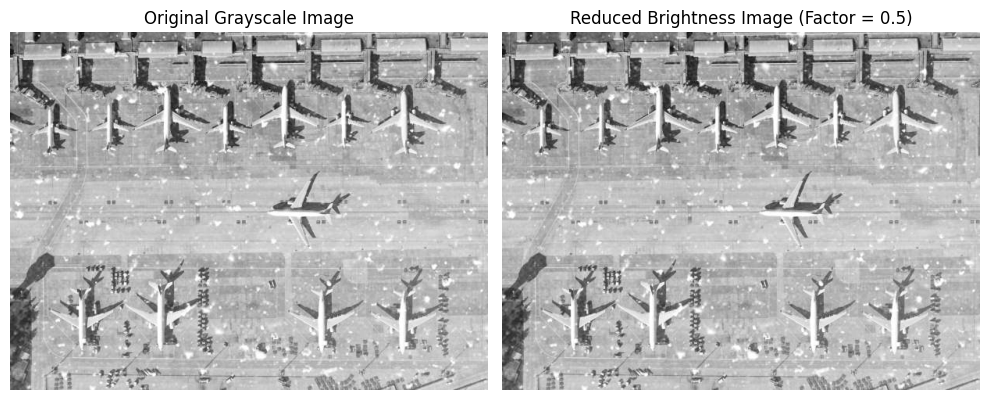

In [6]:
from skimage.color import rgb2gray
image_path_4=cv2.imread('/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_04.jpg')

if len(image_path_4.shape) == 3:
    gray_image = rgb2gray(image_path_4)
else:
    gray_image = image_path_4

factor = 0.5
reduced_brightness_image = gray_image * factor
reduced_brightness_image = np.clip(reduced_brightness_image, 0, 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reduced_brightness_image, cmap='gray')
plt.title(f"Reduced Brightness Image (Factor = {factor})")

plt.axis('off')
plt.tight_layout()
plt.show()


**Lab Task-5**

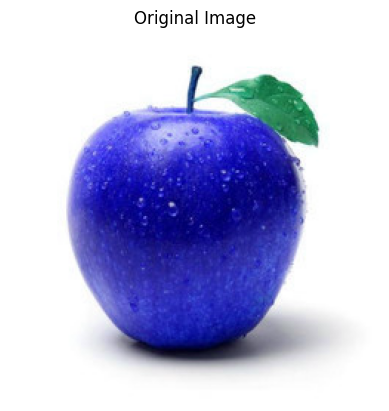

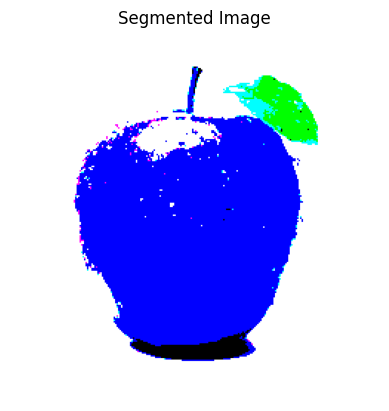

In [8]:
#segmentation
img5 = cv2.imread('/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_05.jpg')

plt.imshow(img5)
plt.axis('off')
plt.title('Original Image')
plt.show()

threshold = 100

rows, cols, channels = img5.shape

for i in range(rows):
  for j in range(cols):
    for k in range(channels):
      if img5[i, j, k]>threshold:
        img5[i, j, k] = 255
      else:
        img5[i, j, k] = 0

plt.imshow(img5, cmap = 'gray')
plt.axis('off')
plt.title('Segmented Image')
plt.show()